In [1]:
#Loading libraries
import numpy as np 
import pandas as pd
import re 
import nltk 
import spacy 
import string 
import email
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

2023-06-22 13:53:30.280828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to /Users/chert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/chert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv("data/combined_spamham.csv")



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   Category    5572 non-null   object
 2   Message     5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [6]:
df.head(3)

Unnamed: 0 Category                                            Message
0           0      ham           Whatever, juliana. Do whatever you want.
1           1      ham  Why must we sit around and wait for summer day...
2           2     spam  CDs 4u: Congratulations ur awarded £500 of CD ...

In [5]:
df.tail(3)

Unnamed: 0 Category                                            Message
5569        5569      ham  Hmm... Dunno leh, mayb a bag 4 goigng out dat ...
5570        5570      ham                           Tell me whos this pls:-)
5571        5571      ham  You are gorgeous! keep those pix cumming :) th...

In [6]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [7]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['Message'].apply(tokenizer.tokenize)
words_descriptions.head()

0         [Whatever, juliana, Do, whatever, you, want]
1    [Why, must, we, sit, around, and, wait, for, s...
2    [CDs, 4u, Congratulations, ur, awarded, 500, o...
3    [Good, afternoon, my, boytoy, How, goes, that,...
4                       [Msg, me, when, rajini, comes]
Name: Message, dtype: object

In [9]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))




90302 words total, with a vocabulary size of 10923


In [10]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('to', 2156),
 ('I', 2022),
 ('you', 1901),
 ('a', 1343),
 ('the', 1209),
 ('i', 999),
 ('and', 868),
 ('in', 841),
 ('u', 819),
 ('is', 815),
 ('me', 749),
 ('for', 657),
 ('my', 639),
 ('it', 621),
 ('of', 601),
 ('your', 563),
 ('s', 537),
 ('2', 533),
 ('that', 505),
 ('on', 505),
 ('have', 479),
 ('m', 420),
 ('t', 408),
 ('now', 404),
 ('call', 403),
 ('are', 403),
 ('U', 384),
 ('or', 381),
 ('not', 376),
 ('can', 376),
 ('be', 370),
 ('at', 366),
 ('with', 355),
 ('will', 343),
 ('get', 338),
 ('so', 328),
 ('4', 327),
 ('gt', 318),
 ('lt', 316),
 ('but', 303),
 ('ur', 298),
 ('You', 290),
 ('do', 287),
 ('up', 283),
 ('ll', 270),
 ('we', 260),
 ('from', 259),
 ('out', 258),
 ('know', 255),
 ('go', 250),
 ('if', 246),
 ('when', 245),
 ('this', 244),
 ('just', 244),
 ('like', 235),
 ('all', 233),
 ('come', 211),
 ('got', 207),
 ('there', 202),
 ('day', 202),
 ('was', 201),
 ('time', 196),
 ('am', 193),
 ('No', 190),
 ('then', 183),
 ('only', 179),
 ('1', 173),
 ('he', 173),
 ('

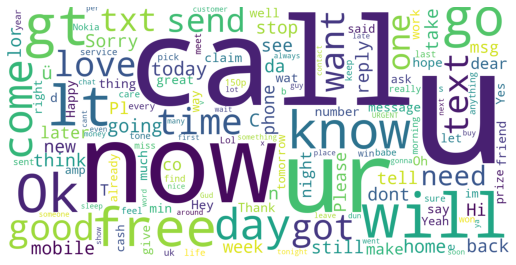

In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Visualise Email Subject

wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(df['Message'])) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [12]:
df['scores'] = df['Message'].apply(lambda review: analyser.polarity_scores(review))
df.head()

Unnamed: 0 Category                                            Message  \
0           0      ham           Whatever, juliana. Do whatever you want.   
1           1      ham  Why must we sit around and wait for summer day...   
2           2     spam  CDs 4u: Congratulations ur awarded £500 of CD ...   
3           3      ham  Good afternoon my boytoy. How goes that walkin...   
4           4      ham                          Msg me when rajini comes.   

   description_lengths                                             scores  
0                    6  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...  
1                   27  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...  
2                   27  {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...  
3                   30  {'neg': 0.047, 'neu': 0.852, 'pos': 0.101, 'co...  
4                    5  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

In [13]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)
# del df['Unnamed: 0']

In [14]:
df.head(3)

Category                                            Message  \
0      ham           Whatever, juliana. Do whatever you want.   
1      ham  Why must we sit around and wait for summer day...   
2     spam  CDs 4u: Congratulations ur awarded £500 of CD ...   

   description_lengths                                             scores  
0                    6  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...  
1                   27  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...  
2                   27  {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...

In [15]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

Category                                            Message  \
0      ham           Whatever, juliana. Do whatever you want.   
1      ham  Why must we sit around and wait for summer day...   
2     spam  CDs 4u: Congratulations ur awarded £500 of CD ...   
3      ham  Good afternoon my boytoy. How goes that walkin...   
4      ham                          Msg me when rajini comes.   

   description_lengths                                             scores  \
0                    6  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...   
1                   27  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...   
2                   27  {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...   
3                   30  {'neg': 0.047, 'neu': 0.852, 'pos': 0.101, 'co...   
4                    5  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

   compound  
0    0.0772  
1    0.5719  
2    0.9081  
3    0.4291  
4    0.0000

In [16]:
df['compound'].describe()

count    5572.000000
mean        0.200069
std         0.419465
min        -0.952400
25%         0.000000
50%         0.000000
75%         0.555300
max         0.996600
Name: compound, dtype: float64

In [17]:
df['compound'].median()

0.0

In [18]:
def Sentimnt(x):
    if x>= 0:
        return "Positive"
    elif x< 0:
        return "Negative"

df['Sentiment'] = df['compound'].apply(Sentimnt)


df.head()

Category                                            Message  \
0      ham           Whatever, juliana. Do whatever you want.   
1      ham  Why must we sit around and wait for summer day...   
2     spam  CDs 4u: Congratulations ur awarded £500 of CD ...   
3      ham  Good afternoon my boytoy. How goes that walkin...   
4      ham                          Msg me when rajini comes.   

   description_lengths                                             scores  \
0                    6  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...   
1                   27  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...   
2                   27  {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...   
3                   30  {'neg': 0.047, 'neu': 0.852, 'pos': 0.101, 'co...   
4                    5  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

   compound Sentiment  
0    0.0772  Positive  
1    0.5719  Positive  
2    0.9081  Positive  
3    0.4291  Positive  
4    0.0000  Positive

In [19]:
df['temp_list'] = df['Message'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
#temp.style.background_gradient(cmap='Blues')

In [20]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [21]:
df.head(3)

Category                                            Message  \
0      ham           Whatever, juliana. Do whatever you want.   
1      ham  Why must we sit around and wait for summer day...   
2     spam  CDs 4u: Congratulations ur awarded £500 of CD ...   

   description_lengths                                             scores  \
0                    6  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...   
1                   27  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...   
2                   27  {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...   

   compound Sentiment                                          temp_list  
0    0.0772  Positive    [Whatever,, juliana., Do, whatever, you, want.]  
1    0.5719  Positive  [Why, must, we, sit, around, and, wait, for, s...  
2    0.9081  Positive  [CDs, 4u:, Congratulations, ur, awarded, £500,...

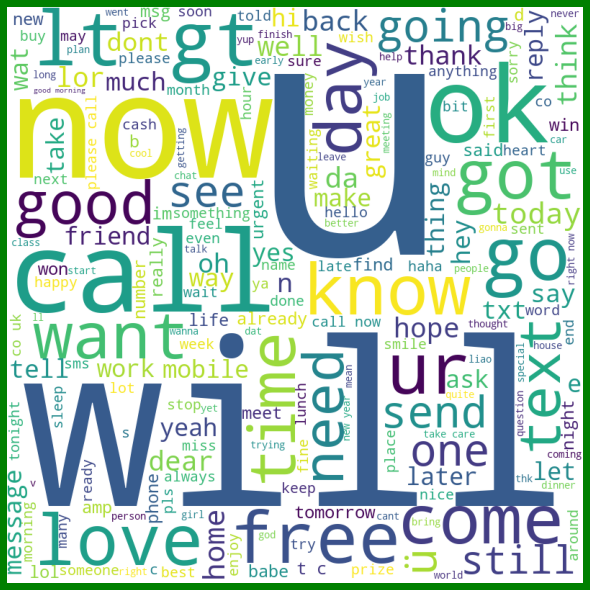

In [22]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Positive"] 
# iterate through the csv file 
for val in df_positive.Message: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

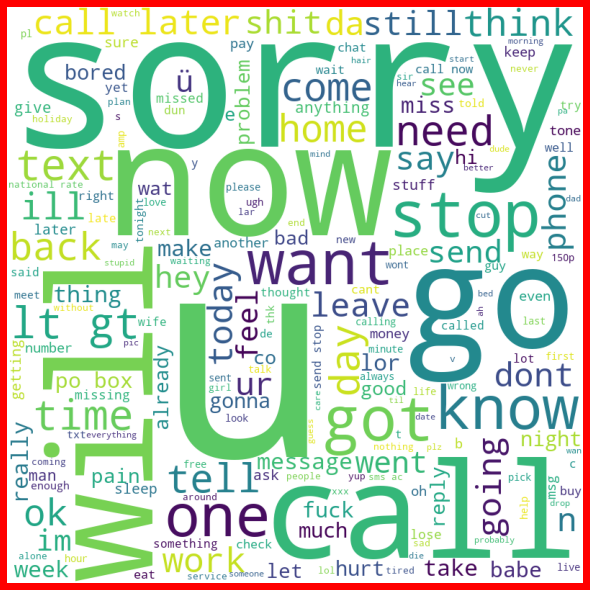

In [23]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Negative"] 
# iterate through the csv file 
for val in df_positive.Message: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [24]:
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber

In [25]:
# Applying on dataset
df['TB_score']= df.Message.apply(lambda x: TextBlob(x).sentiment)
df.head()

Category                                            Message  \
0      ham           Whatever, juliana. Do whatever you want.   
1      ham  Why must we sit around and wait for summer day...   
2     spam  CDs 4u: Congratulations ur awarded £500 of CD ...   
3      ham  Good afternoon my boytoy. How goes that walkin...   
4      ham                          Msg me when rajini comes.   

   description_lengths                                             scores  \
0                    6  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...   
1                   27  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...   
2                   27  {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...   
3                   30  {'neg': 0.047, 'neu': 0.852, 'pos': 0.101, 'co...   
4                    5  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

   compound Sentiment                                          temp_list  \
0    0.0772  Positive    [Whatever,, juliana., Do, whatever, you, want.]   
1    0.5719  Positive  [Why, must, we, sit, around, and, wait, for, s...   
2    0.9081  Positive  [CDs, 4u:, Congratulations, ur, awarded, £500,...   
3    0.4291  Positive  [Good, afternoon, my, boytoy., How, goes, that...   
4    0.0000  Positive                    [Msg, me, when, rajini, comes.]   

                     TB_score  
0                  (0.0, 0.0)  
1  (0.16666666666666666, 0.5)  
2                  (0.0, 0.0)  
3   (0.7, 0.6000000000000001)  
4                  (0.0, 0.0)

In [26]:

df[["compound"]].describe()

compound
count  5572.000000
mean      0.200069
std       0.419465
min      -0.952400
25%       0.000000
50%       0.000000
75%       0.555300
max       0.996600

In [27]:
df['TB_sentiment'] = df['Message'].apply(lambda x: TextBlob(x).sentiment[0])
df.head()

Category                                            Message  \
0      ham           Whatever, juliana. Do whatever you want.   
1      ham  Why must we sit around and wait for summer day...   
2     spam  CDs 4u: Congratulations ur awarded £500 of CD ...   
3      ham  Good afternoon my boytoy. How goes that walkin...   
4      ham                          Msg me when rajini comes.   

   description_lengths                                             scores  \
0                    6  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...   
1                   27  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...   
2                   27  {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...   
3                   30  {'neg': 0.047, 'neu': 0.852, 'pos': 0.101, 'co...   
4                    5  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

   compound Sentiment                                          temp_list  \
0    0.0772  Positive    [Whatever,, juliana., Do, whatever, you, want.]   
1    0.5719  Positive  [Why, must, we, sit, around, and, wait, for, s...   
2    0.9081  Positive  [CDs, 4u:, Congratulations, ur, awarded, £500,...   
3    0.4291  Positive  [Good, afternoon, my, boytoy., How, goes, that...   
4    0.0000  Positive                    [Msg, me, when, rajini, comes.]   

                     TB_score  TB_sentiment  
0                  (0.0, 0.0)      0.000000  
1  (0.16666666666666666, 0.5)      0.166667  
2                  (0.0, 0.0)      0.000000  
3   (0.7, 0.6000000000000001)      0.700000  
4                  (0.0, 0.0)      0.000000

In [28]:
from nrclex import NRCLex
email = NRCLex('Good work to the team')
#Return affect dictionary
print(email.affect_dict)
#Return raw emotional counts
print("\n",email.raw_emotion_scores)
#Return highest emotions
print("\n", email.top_emotions)
#Return affect frequencies
print("\n",email.affect_frequencies)

{'team': ['trust']}

 {'trust': 1}

 [('trust', 1.0)]

 {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 1.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}


In [29]:
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
df['Emotion'] = df['Message'].apply(emotion)
df.head()

Category                                            Message  \
0      ham           Whatever, juliana. Do whatever you want.   
1      ham  Why must we sit around and wait for summer day...   
2     spam  CDs 4u: Congratulations ur awarded £500 of CD ...   
3      ham  Good afternoon my boytoy. How goes that walkin...   
4      ham                          Msg me when rajini comes.   

   description_lengths                                             scores  \
0                    6  {'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...   
1                   27  {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...   
2                   27  {'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compou...   
3                   30  {'neg': 0.047, 'neu': 0.852, 'pos': 0.101, 'co...   
4                    5  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   

   compound Sentiment                                          temp_list  \
0    0.0772  Positive    [Whatever,, juliana., Do, whatever, you, want.]   
1    0.5719  Positive  [Why, must, we, sit, around, and, wait, for, s...   
2    0.9081  Positive  [CDs, 4u:, Congratulations, ur, awarded, £500,...   
3    0.4291  Positive  [Good, afternoon, my, boytoy., How, goes, that...   
4    0.0000  Positive                    [Msg, me, when, rajini, comes.]   

                     TB_score  TB_sentiment       Emotion  
0                  (0.0, 0.0)      0.000000    No emotion  
1  (0.16666666666666666, 0.5)      0.166667  anticipation  
2                  (0.0, 0.0)      0.000000      surprise  
3   (0.7, 0.6000000000000001)      0.700000          fear  
4                  (0.0, 0.0)      0.000000    No emotion

In [30]:
df.tail()

Category                                            Message  \
5567      ham                            K:)k:)good:)study well.   
5568      ham  Chinatown got porridge, claypot rice, yam cake...   
5569      ham  Hmm... Dunno leh, mayb a bag 4 goigng out dat ...   
5570      ham                           Tell me whos this pls:-)   
5571      ham  You are gorgeous! keep those pix cumming :) th...   

      description_lengths                                             scores  \
5567                    5  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...   
5568                   23  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
5569                   24  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
5570                    5  {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...   
5571                    9  {'neg': 0.0, 'neu': 0.41, 'pos': 0.59, 'compou...   

      compound Sentiment                                          temp_list  \
5567    0.2732  Positive                         [K:)k:)good:)study, well.]   
5568    0.0000  Positive  [Chinatown, got, porridge,, claypot, rice,, ya...   
5569    0.0000  Positive  [Hmm..., Dunno, leh,, mayb, a, bag, 4, goigng,...   
5570    0.0964  Positive                     [Tell, me, whos, this, pls:-)]   
5571    0.8774  Positive  [You, are, gorgeous!, keep, those, pix, cummin...   

          TB_score  TB_sentiment     Emotion  
5567    (0.0, 0.0)          0.00    positive  
5568    (0.4, 0.7)          0.40    positive  
5569  (-0.25, 0.4)         -0.25    negative  
5570    (0.5, 1.0)          0.50  No emotion  
5571  (0.75, 0.95)          0.75    positive

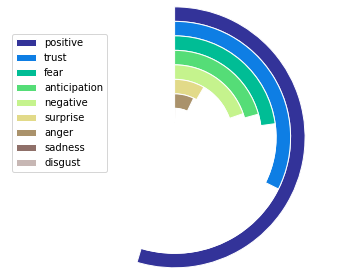

In [31]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

df_chart = df[df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()